#**Loan Approval Prediction**

**Problem Statement:**

> **About Company**

  * Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas.
  * Customer first apply for home loan after that company validates the customer eligibility for loan.


> **Objective:**

  * Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.
  * To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.


> **Dataset Description:**
* Loan_ID: Unique Loan ID
* Gender: Male/ Female
* Married: Applicant married (Y/N)
* Dependents: Number of dependents
* Education: Applicant Education (Graduate/ Under Graduate)
* Self_Employed: Self employed (Y/N)
* ApplicantIncome: Applicant income
* CoapplicantIncome: Coapplicant income
* LoanAmount: Loan amount in thousands
* Loan_Amount_Term: Term of loan in months
* Credit_History: credit history meets guidelines
* Property_Area: Urban/ Semi Urban/ Rural
* Loan_Status: Loan approved (Y/N)





In [1]:
## Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
## Importing the dataset
df=pd.read_csv(r"/content/drive/MyDrive/csv_nbks/Loan Prediction.xls")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
## Check dataframe dimensions
df.shape

(614, 13)

In [4]:
## Get a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
## Generate descriptive statistics.
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
## Generate descriptive statistics for categorical features.
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
df["Loan_Status"].value_counts()

,count
Loan_Status,
Y,422
N,192


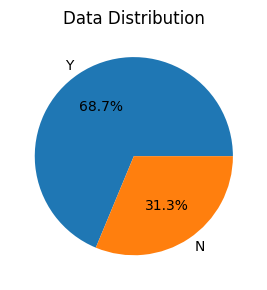

In [8]:
plt.figure(figsize=(3,3))
plt.pie(x=df['Loan_Status'].value_counts().values,labels=df['Loan_Status'].value_counts().index,autopct='%1.1f%%')
plt.title("Data Distribution")
plt.tight_layout()

Observation:

* It is imabalnced dataset,so we have to use upsampling or weight method to balance the data.

**Handling Missing Values**

In [9]:
## Check for null values
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [10]:
# Percentage of missing values
df.isnull().sum()/len(df)*100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


<Axes: >

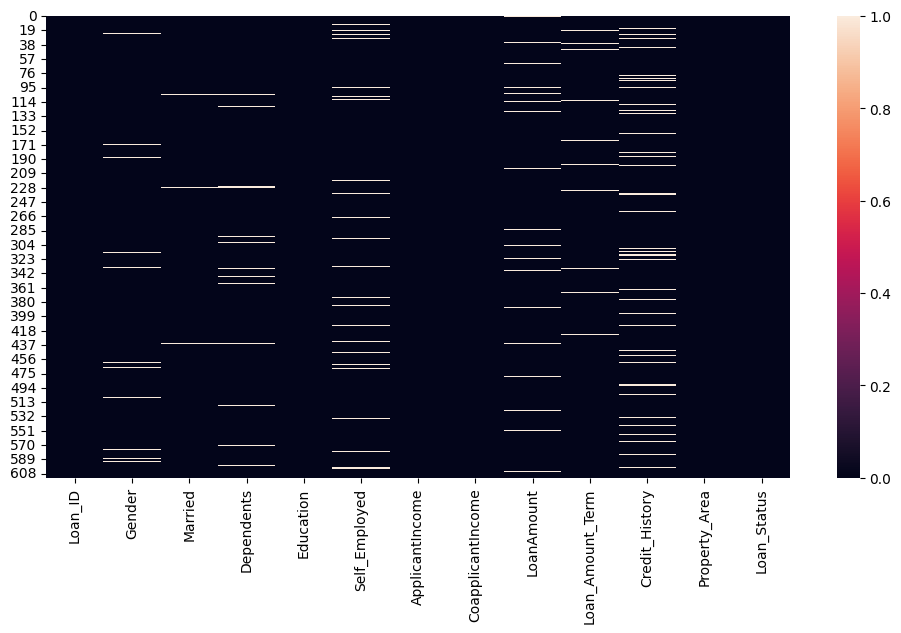

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [12]:
## Create numerical feature's dataframe
df_num=df.select_dtypes(["int64","float64"])
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


**Checking skewness value for numerical column**

In [21]:
right_skewed={}
left_skewed={}
normal={}

for feature in df_num.columns:
    s=stats.skew(df_num[feature])
    if(s > 0):
        right_skewed[feature]=round(s,2)
    elif(s < 0):
        left_skewed[feature]=round(s,2)
    else:
        normal[feature]=round(s,2)

In [22]:
right_skewed

{'ApplicantIncome': 6.52, 'CoapplicantIncome': 7.47}

In [23]:
left_skewed

{}

In [24]:
normal

{'LoanAmount': nan, 'Loan_Amount_Term': nan, 'Credit_History': nan}

In [27]:
## Mean Imputation for null values
df_num["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)
df_num["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(),inplace=True)
df_num["Credit_History"].fillna(df["Credit_History"].mean(),inplace=True)

In [28]:
df_num.isnull().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [29]:
df_cat=df.select_dtypes("object")
df_cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [30]:
## Mode imputation for categorical features
df_cat["Gender"].fillna(df_cat["Gender"].mode()[0],inplace=True)
df_cat["Married"].fillna(df_cat["Married"].mode()[0],inplace=True)
df_cat["Dependents"].fillna(df_cat["Dependents"].mode()[0],inplace=True)
df_cat["Self_Employed"].fillna(df_cat["Self_Employed"].mode()[0],inplace=True)

In [31]:
df_cat.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Property_Area,0
Loan_Status,0


In [32]:
df_cat["Loan_ID"].nunique()

614

In [33]:
## Drop Loan_ID column as its has all unique values
df_cat.drop(columns="Loan_ID",axis=1,inplace=True)

In [34]:
df_cat["Dependents"].value_counts()

,count
Dependents,
0,360
1,102
2,101
3+,51


In [35]:
df_cat["Dependents"].replace({'3+':'4'},inplace=True)

In [36]:
df=pd.concat([df_num,df_cat],axis=1)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
1,4583,1508.0,128.000000,360.0,1.0,Male,Yes,1,Graduate,No,Rural,N
2,3000,0.0,66.000000,360.0,1.0,Male,Yes,0,Graduate,Yes,Urban,Y
3,2583,2358.0,120.000000,360.0,1.0,Male,Yes,0,Not Graduate,No,Urban,Y
4,6000,0.0,141.000000,360.0,1.0,Male,No,0,Graduate,No,Urban,Y


**Exploratory Data Analysis**

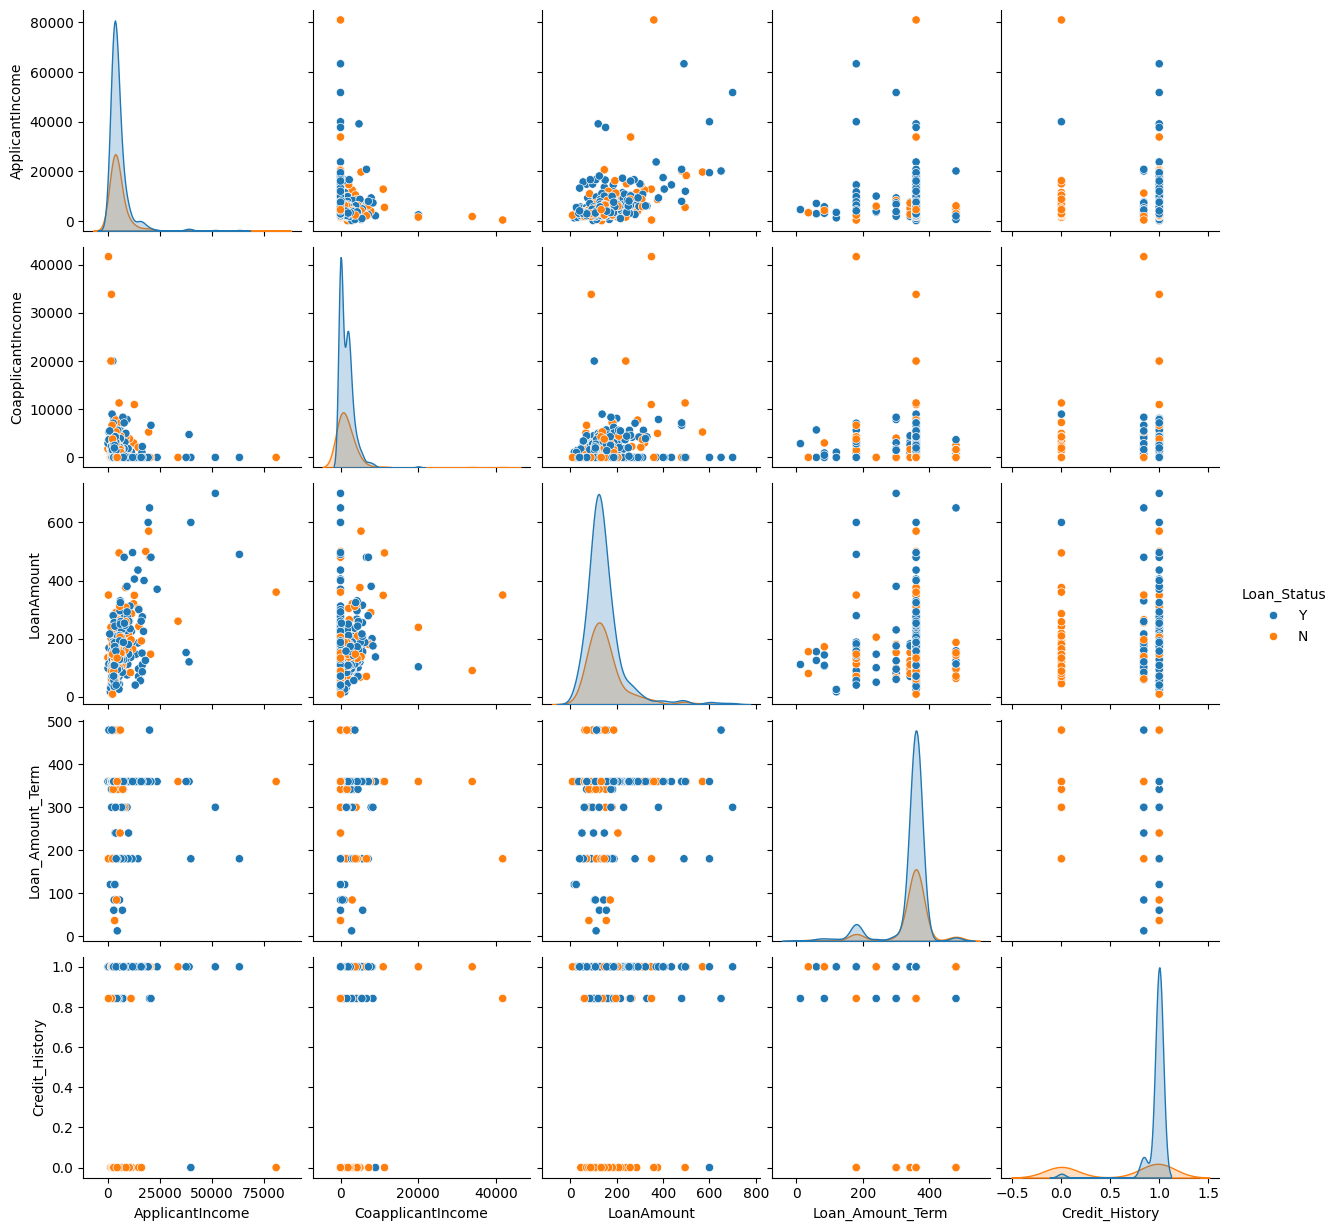

In [37]:
sns.pairplot(data=df,hue="Loan_Status")

In [38]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


<Axes: xlabel='Married', ylabel='count'>

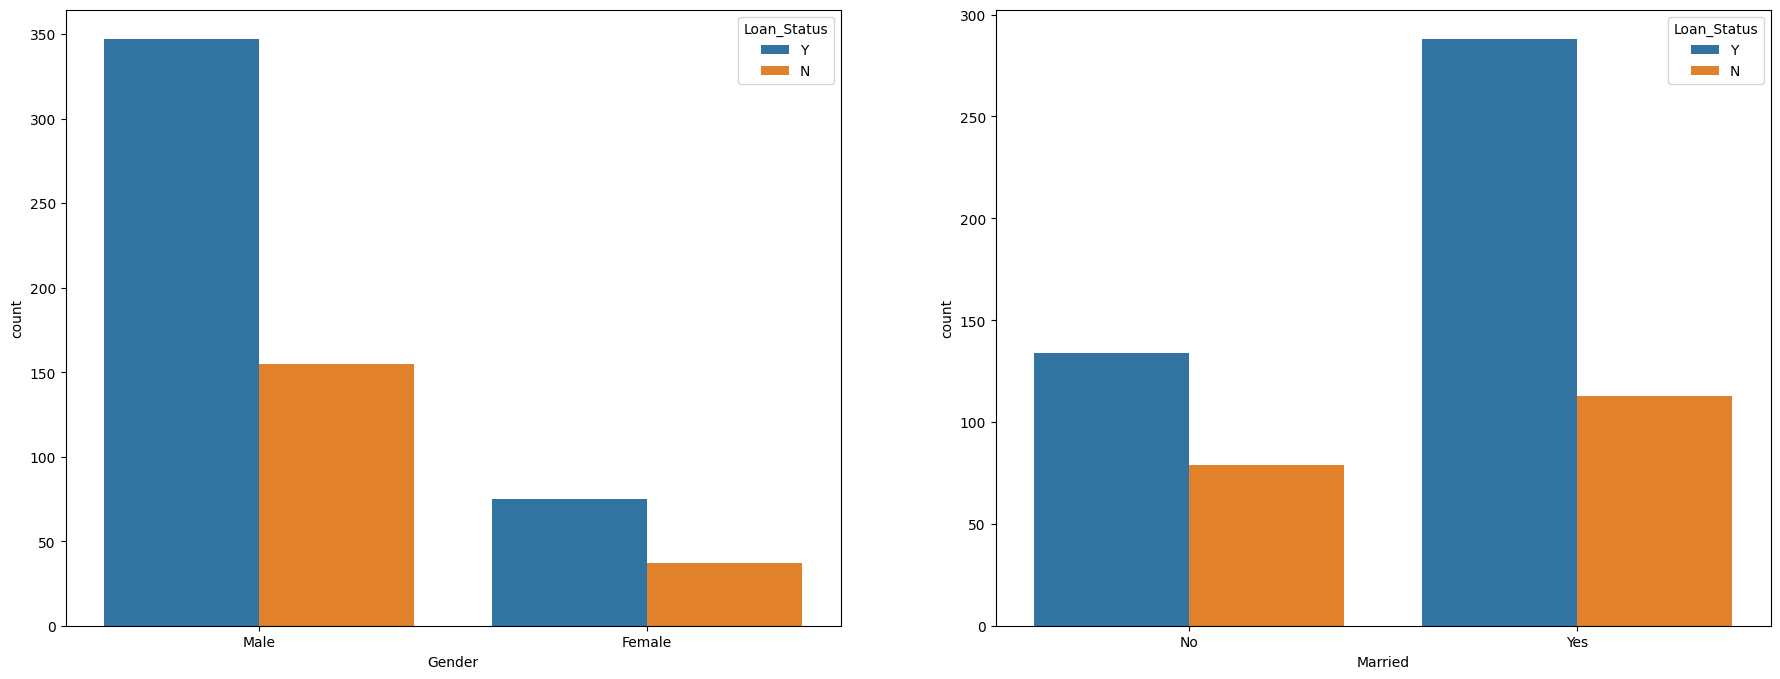

In [39]:
plt.figure(figsize=(22,8))

# Education & Loan Status
plt.subplot(1,2,1)
sns.countplot(x='Gender',hue='Loan_Status',data=df)

# Marital status & Loan Status
plt.subplot(1,2,2)
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [40]:
df["Married"].value_counts(normalize=True)*100

,proportion
Married,
Yes,65.309446
No,34.690554


Observation:
* Based on gender,more loans are approved for male compared to female.
* 65% of the population in the dataset is Married and Married applicants are more likely to be granted loans.

<Axes: xlabel='Education', ylabel='count'>

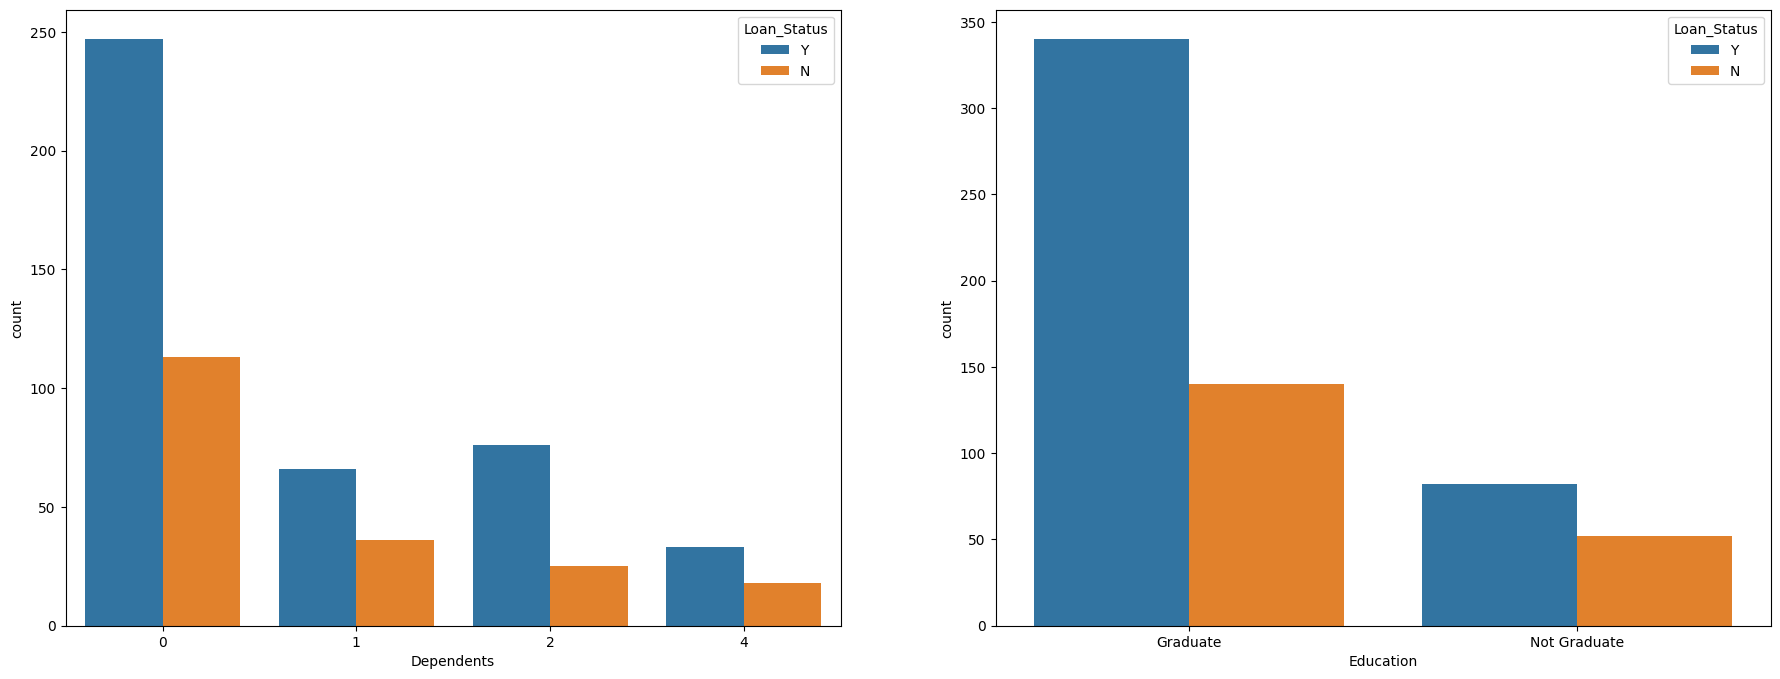

In [41]:
plt.figure(figsize=(22,8))

# Education & Loan Status
plt.subplot(1,2,1)
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

# Marital status & Loan Status
plt.subplot(1,2,2)
sns.countplot(x='Education',hue='Loan_Status',data=df)

In [42]:
df["Education"].value_counts(normalize=True)*100

,proportion
Education,
Graduate,78.175896
Not Graduate,21.824104


Observation:

* Majority of the population have zero dependents and are also likely to accepted for loan.
* About 78% of the population is Graduate and graduates have higher propotion of loan approval.

<Axes: xlabel='Property_Area', ylabel='count'>

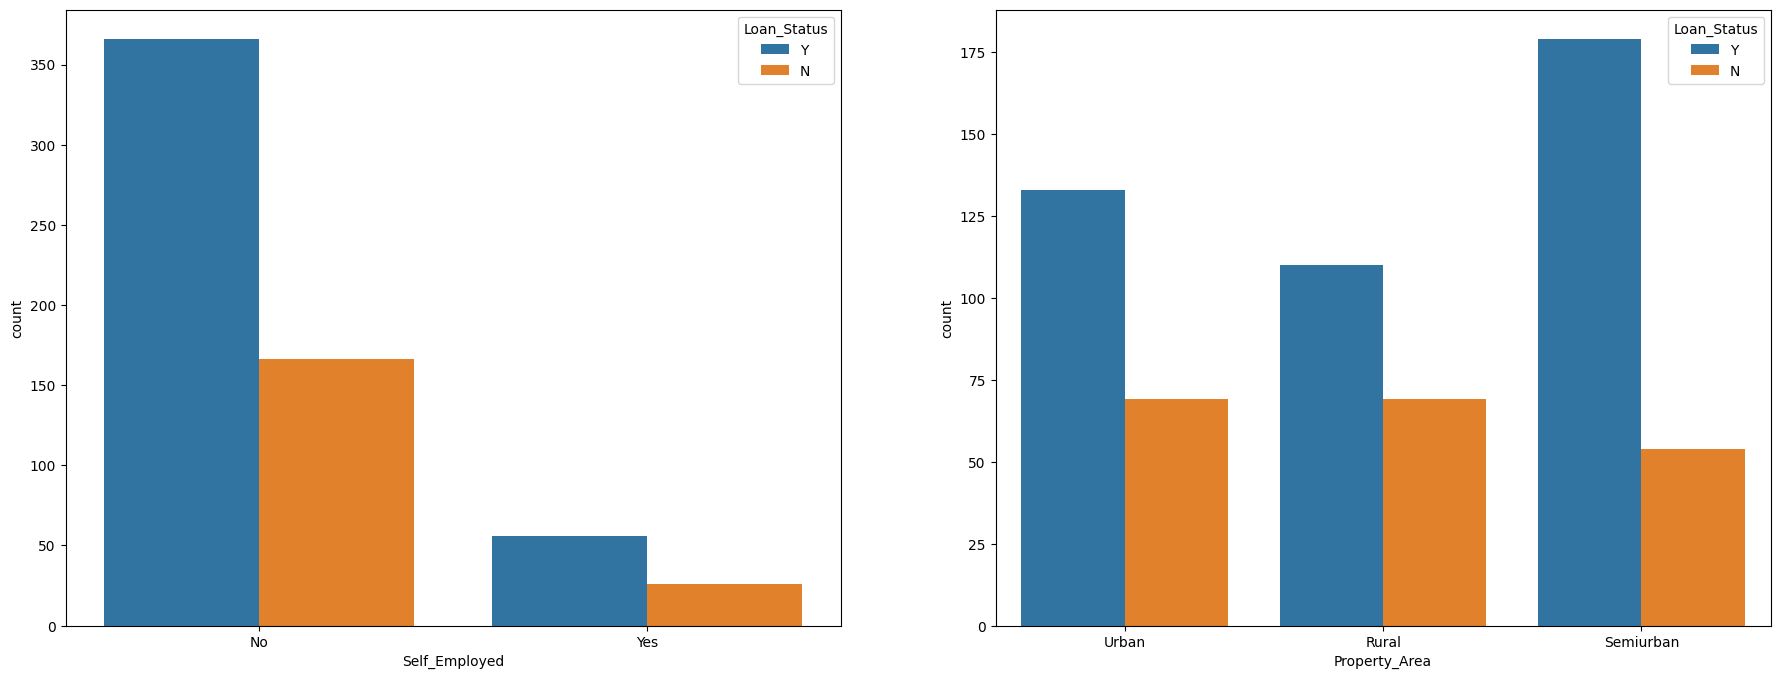

In [43]:
plt.figure(figsize=(22,8))

# Education & Loan Status
plt.subplot(1,2,1)
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

# Marital status & Loan Status
plt.subplot(1,2,2)
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

Observation:

* Persons who are self employed have less proportion of getting loan approval compare to who are not self employed.
* More applicants are from Semi-urban and also they are more likely to be granted loans.

**Outlier Treatment**

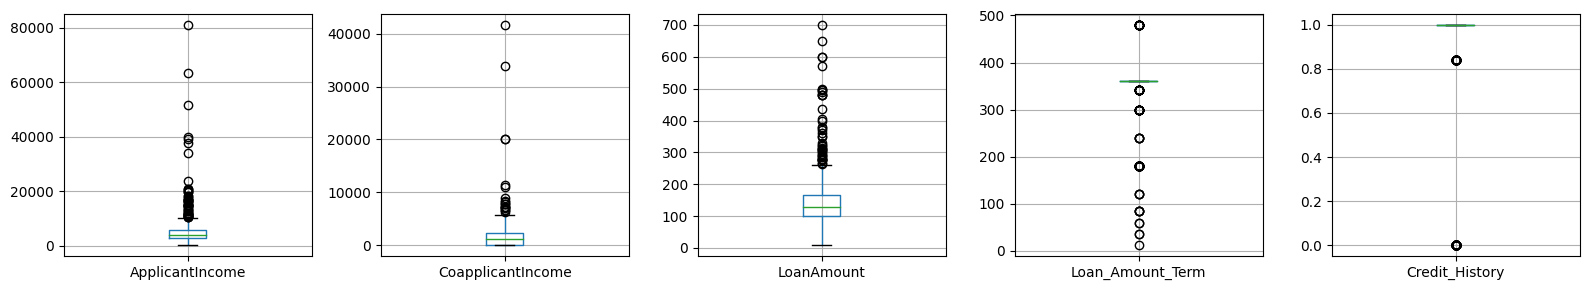

In [44]:
## Check for outliers for all numerical features using boxplot.
plt.figure(figsize=(16,3))
for feature, i in zip(df_num.columns,range(1,6)):
    plt.subplot(1,5,i)
    df_num.boxplot(column=feature)
    plt.tight_layout()

**Handling upper and lower whisker outliers**

In [45]:
df_num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [50]:
## Handling upper whisker outliers
upper=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for feature in upper:
    p_95 = np.percentile(df_num[feature], 95)
    df_num.loc[df_num[feature] > p_95, feature] = p_95

## Handling lower whisker outliers
lower=['Loan_Amount_Term']

for feature in lower:
    p_5= np.percentile(df_num[feature], 5)
    df_num.loc[df_num[feature] < p_5,feature] = p_5

**Checking features after outliers treatment**

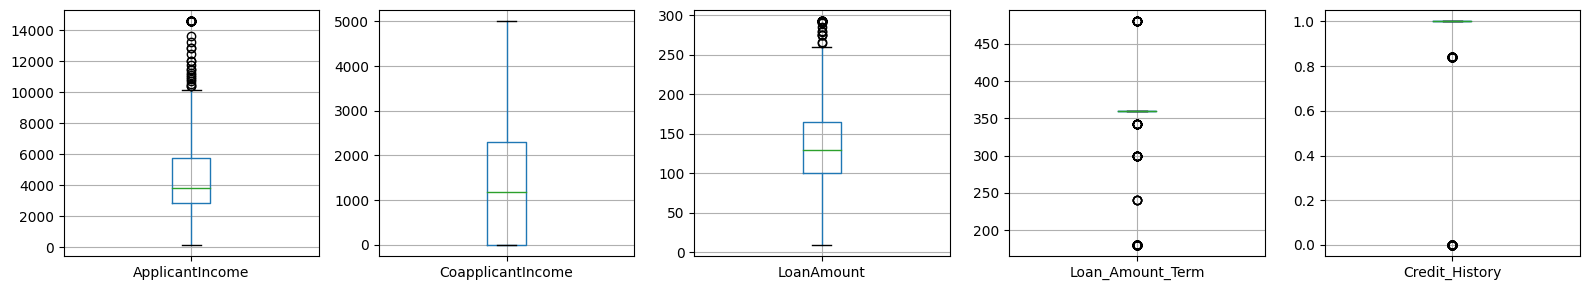

In [51]:
plt.figure(figsize=(16,3))
for feature, i in zip(df_num.columns,range(1,6)):
    plt.subplot(1,5,i)
    df_num.boxplot(column=feature)
    plt.tight_layout()

**Multicollinearity**

In [52]:
## Show the correlation between numericals features.
df_num.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.226493,0.554941,-0.024770,0.039640
CoapplicantIncome,-0.226493,1.000000,0.249011,-0.030753,-0.012919
LoanAmount,0.554941,0.249011,1.000000,0.051997,-0.000907
Loan_Amount_Term,-0.024770,-0.030753,0.051997,1.000000,0.014470
Credit_History,0.039640,-0.012919,-0.000907,0.014470,1.000000


<Axes: >

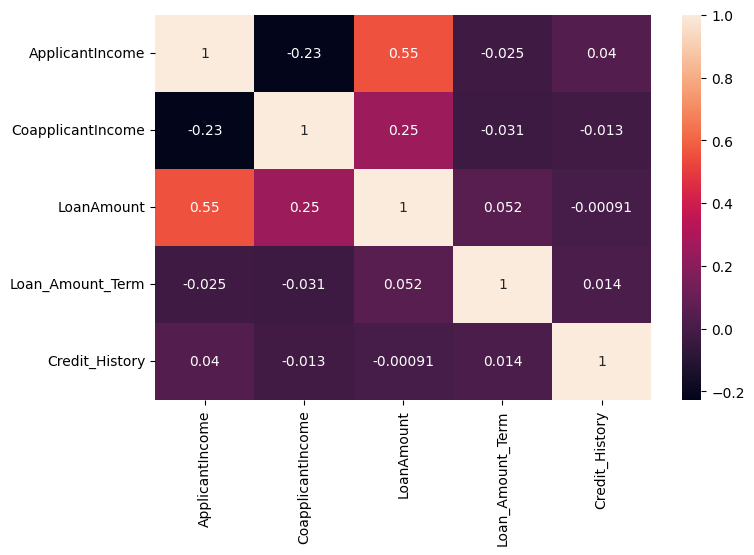

In [59]:
plt.figure(figsize=(8,5))
sns.heatmap(df_num.corr(),annot=True)

**variance_inflation_factor**

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
df_num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [62]:
vif = pd.DataFrame()  ## Create empty dataframe
vif["variables"] = df_num.columns
vif["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]
vif

,variables,VIF
0,ApplicantIncome,6.029085
1,CoapplicantIncome,2.389546
2,LoanAmount,11.811653
3,Loan_Amount_Term,9.865494
4,Credit_History,6.092852


**Checking distribution of each feature**

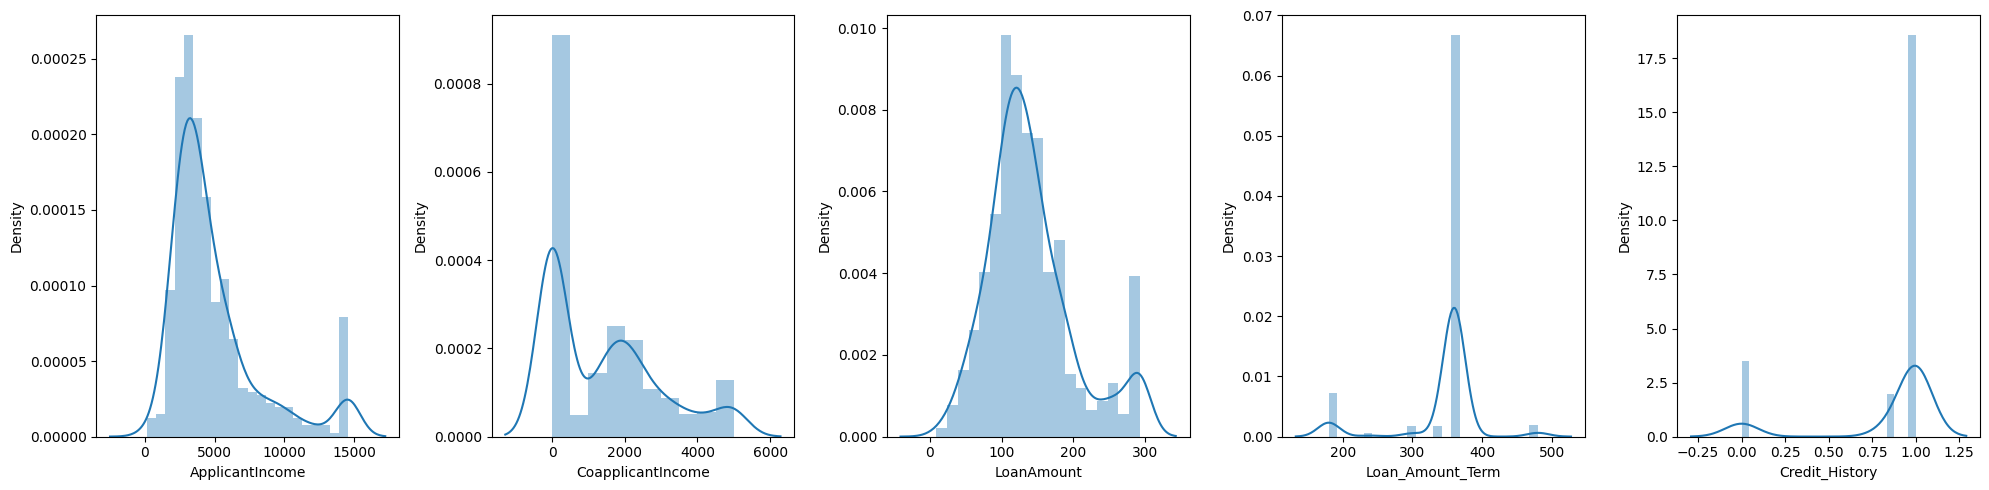

In [63]:
plt.figure(figsize=(20,5))
for feature,i in zip(df_num.columns,range(1,6)):
    plt.subplot(1,5,i)
    sns.distplot(df_num[feature],kde=True)
    plt.tight_layout()

In [64]:
right_skewed

{'ApplicantIncome': 6.52, 'CoapplicantIncome': 7.47}

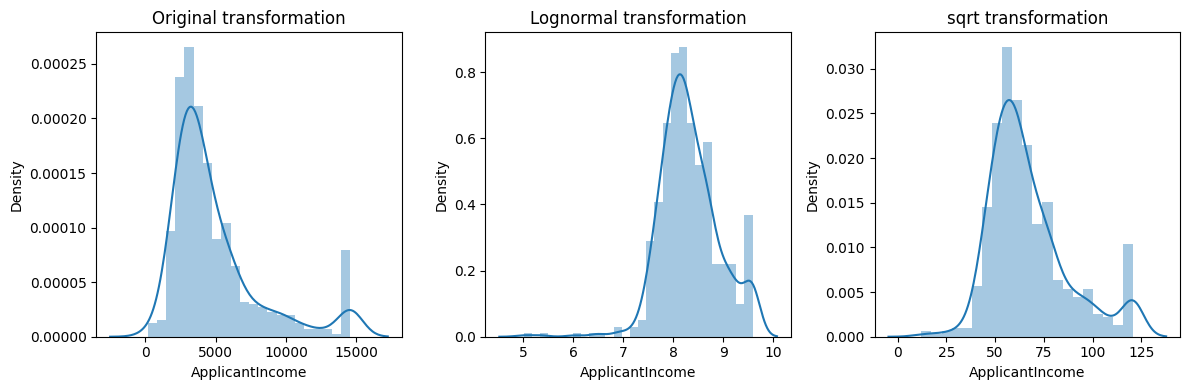

In [65]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.distplot(df_num["ApplicantIncome"])
plt.title("Original transformation")

plt.subplot(1,3,2)
sns.distplot(np.log(df_num["ApplicantIncome"]))
plt.title("Lognormal transformation")

plt.subplot(1,3,3)
sns.distplot(np.sqrt(df_num["ApplicantIncome"]))
plt.title("sqrt transformation")

plt.tight_layout()

In [66]:
print("original:",stats.skew(df_num["ApplicantIncome"]))
print("log-normal:",stats.skew(np.log(df_num["ApplicantIncome"])))
print("sqrt:",stats.skew(np.sqrt(df_num["ApplicantIncome"])))

original: 1.7119447438594193
log-normal: -0.18383768855424304
sqrt: 1.0486579893894232


Observation:

* Use log-normal transformation for ApplicantIncome column.

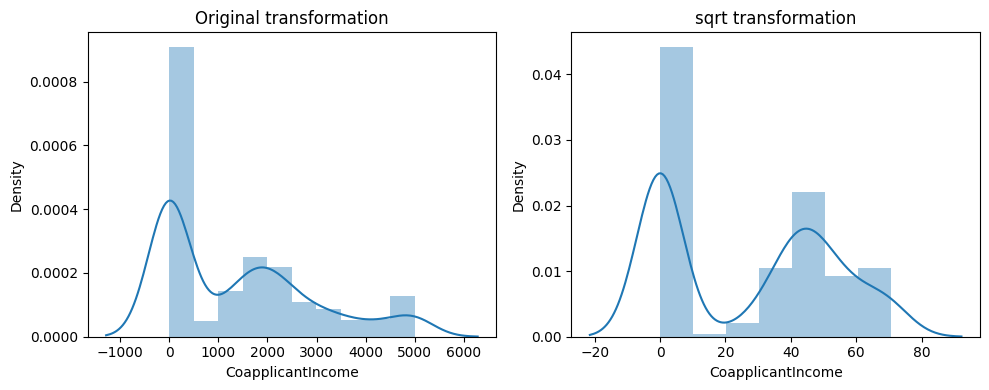

In [67]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.distplot(df_num["CoapplicantIncome"])
plt.title("Original transformation")

plt.subplot(1,2,2)
sns.distplot(np.sqrt(df_num["CoapplicantIncome"]))
plt.title("sqrt transformation")

plt.tight_layout()

In [68]:
print("original:",stats.skew(df_num["CoapplicantIncome"]))
print("sqrt:",stats.skew(np.sqrt(df_num["CoapplicantIncome"])))

original: 0.842917487831009
sqrt: 0.14770923873017147


Observation:

* Use sqrt transformation for CoapplicantIncome column.

In [69]:
## Feature transformation
df_num["ApplicantIncome"]=np.log(df_num["ApplicantIncome"])
df_num["CoapplicantIncome"]=np.sqrt(df_num["CoapplicantIncome"])

**Check feature distribution after transformation**

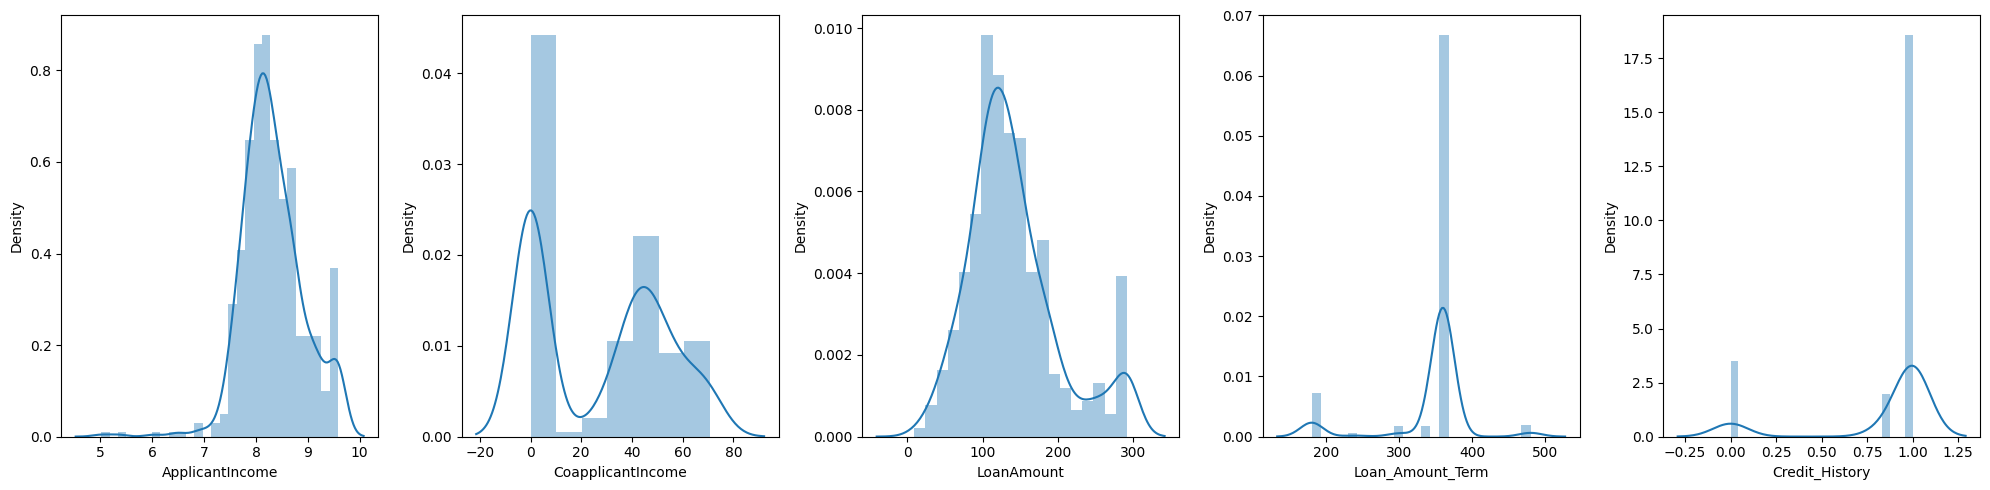

In [71]:
plt.figure(figsize=(20,5))
for feature,i in zip(df_num.columns,range(1,6)):
    plt.subplot(1,5,i)
    sns.distplot(df_num[feature],kde=True)
    plt.tight_layout()

**Data Preprocessing - Encoding**

In [72]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [73]:
df_cat["Gender"] = df_cat["Gender"].map({'Male':1,'Female':0})
df_cat["Married"] = df_cat["Married"].map({'Yes':1,'No':0})
df_cat["Education"] = df_cat["Education"].map({'Graduate':1,'Not Graduate':0})
df_cat["Self_Employed"] = df_cat["Self_Employed"].map({'Yes':1,'No':0})
df_cat["Property_Area"] = df_cat["Property_Area"].map({'Rural':0,'Semiurban':1,'Urban':2})
df_cat["Loan_Status"] = df_cat["Loan_Status"].map({'Y':1,'N':0})

In [74]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,1,0,2,1
1,1,1,1,1,0,0,0
2,1,1,0,1,1,2,1
3,1,1,0,0,0,2,1
4,1,0,0,1,0,2,1


In [75]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,1,0,2,1
1,1,1,1,1,0,0,0
2,1,1,0,1,1,2,1
3,1,1,0,0,0,2,1
4,1,0,0,1,0,2,1


In [76]:
## Combine all features into single dataframe.
df_final=pd.concat([df_num,df_cat], axis= 1)
df_final.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,8.674026,0.000000,146.412162,360.0,1.0,1,0,0,1,0,2,1
1,8.430109,38.832976,128.000000,360.0,1.0,1,1,1,1,0,0,0
2,8.006368,0.000000,66.000000,360.0,1.0,1,1,0,1,1,2,1
3,7.856707,48.559242,120.000000,360.0,1.0,1,1,0,0,0,2,1
4,8.699515,0.000000,141.000000,360.0,1.0,1,0,0,1,0,2,1


Observation:

* Now the above dataframe is ready so we can use it for applying any machine learning model to predict output.

# Loan Approval Prediction

**Spliting features & target values**

In [77]:
x=df_final.drop("Loan_Status",axis=1)
y=df_final["Loan_Status"]

In [78]:
x.shape,y.shape

((614, 11), (614,))

**Spliting data into train and test**

In [79]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state = 56,stratify=y)

In [80]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((429, 11), (185, 11), (429,), (185,))

In [81]:
df_final["Loan_Status"].value_counts(normalize=True)

,proportion
Loan_Status,
1,0.687296
0,0.312704


In [82]:
y_train.value_counts(normalize=True)

,proportion
Loan_Status,
1,0.687646
0,0.312354


In [83]:
y_test.value_counts(normalize=True)

,proportion
Loan_Status,
1,0.686486
0,0.313514


**Standardization**

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Model 1 : Logistic Regression**

In [85]:
## Creating instance model of logistic regression class
model_lr=LogisticRegression(random_state=11,n_jobs=-1)

In [86]:
## Fit the training data
model_lr.fit(x_train,y_train)

LogisticRegression(n_jobs=-1, random_state=11)

In [87]:
## Predict values using train data
y_train_predict_lr=model_lr.predict(x_train)

## Predict values using test data
y_test_predict_lr=model_lr.predict(x_test)

**Logistic Regression Model Evaluation**

In [88]:
w=model_lr.coef_
print(f"weight={w}")

weight=[[ 0.06799508  0.04739284 -0.30345876 -0.09030125  1.4397005  -0.05341946
   0.23769957  0.10292703  0.24065157  0.01350082  0.08883811]]


In [89]:
b=model_lr.intercept_
print(f"bias={b}")

bias=[0.84005933]


**Accuracy**

In [90]:
# Accuracy score on training data
training_data_accuracy_lr=accuracy_score(y_train,y_train_predict_lr)

# Accuracy on test data
test_data_accuracy_lr=accuracy_score(y_test,y_test_predict_lr)

print(f"Accuracy of training data for Logistic Regression Model ={round(training_data_accuracy_lr*100,2)}%")
print(f"Accuracy of test data for Logistic Regression Model ={round(test_data_accuracy_lr*100,2)}%")

Accuracy of training data for Logistic Regression Model =82.52%
Accuracy of test data for Logistic Regression Model =77.3%


**Confusion Matrix**

<Axes: >

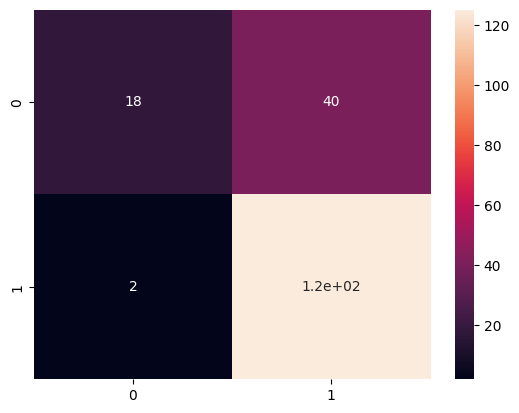

In [91]:
cf_matrix=confusion_matrix(y_test,y_test_predict_lr)
sns.heatmap(cf_matrix,annot=True)

In [92]:
tn,fp,fn,tp=cf_matrix.ravel()
print(f"True positive(TP)={tp}\nTrue negative(TN)={tn}\nFalse positive(FP)={fp}\nFalse negative(FN)={fn}")

True positive(TP)=125
True negative(TN)=18
False positive(FP)=40
False negative(FN)=2


In [93]:
from sklearn.metrics import f1_score,recall_score,precision_score
print("Precision Score:",precision_score(y_test,y_test_predict_lr))
print("Recall Score:",recall_score(y_test,y_test_predict_lr))
print("F Score:",f1_score(y_test,y_test_predict_lr))

Precision Score: 0.7575757575757576
Recall Score: 0.984251968503937
F Score: 0.8561643835616439


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_predict_lr))

              precision    recall  f1-score   support

           0       0.90      0.31      0.46        58
           1       0.76      0.98      0.86       127

    accuracy                           0.77       185
   macro avg       0.83      0.65      0.66       185
weighted avg       0.80      0.77      0.73       185



Observation:

* With default parameters logistic regression model gives accuracy of 77.3 % and f1_score of 0.856.
* We can try different thresholds values to classify labels and select which will give higher accuracy.

**Try Logistic Regression with different threshold value**

In [95]:
train_accuracies_lr = []
train_f1_scores_lr = []
test_accuracies_lr= []
test_f1_scores_lr = []
thresholds = []

for k in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.8
    model_lr = LogisticRegression(solver='liblinear',random_state=11,n_jobs=-1)
    model_lr.fit(x_train,y_train)

    y_train_prob_predict_lr = model_lr.predict_proba(x_train)[:,1]
    y_train_predict_thres=np.array([1 if i>k else 0 for i in y_train_prob_predict_lr])

    # Accuracy and f_score for train data
    train_acc = accuracy_score(y_train,y_train_predict_thres)
    train_f1 = f1_score(y_train,y_train_predict_thres)

    y_test_prob_predict_lr = model_lr.predict_proba(x_test)[:,1]
    y_test_predict_thres=np.array([1 if i>k else 0 for i in y_test_prob_predict_lr])

    # Accuracy and f_score for test data
    test_acc = accuracy_score(y_test,y_test_predict_thres)
    test_f1 = f1_score(y_test,y_test_predict_thres)

    train_accuracies_lr.append(train_acc)
    train_f1_scores_lr.append(train_f1)
    test_accuracies_lr.append(test_acc)
    test_f1_scores_lr.append(test_f1)
    thresholds.append(k)

In [96]:
lr_dic = {"Training Accuracy": train_accuracies_lr, "Test Accuracy": test_accuracies_lr, "Training F1_score": train_f1_scores_lr, "Test F1_score":test_f1_scores_lr, "Decision Threshold": thresholds }
df_logistic = pd.DataFrame(lr_dic)
df_logistic.sort_values(by=["Test F1_score"],ascending=False)

,Training Accuracy,Test Accuracy,Training F1_score,Test F1_score,Decision Threshold
5,0.822844,0.778378,0.883077,0.859107,0.6
1,0.825175,0.772973,0.885496,0.856164,0.2
2,0.825175,0.772973,0.885496,0.856164,0.3
3,0.825175,0.772973,0.885496,0.856164,0.4
4,0.825175,0.772973,0.885145,0.856164,0.5
0,0.785548,0.751351,0.863501,0.845638,0.1
6,0.806527,0.724324,0.865913,0.813187,0.7
7,0.675991,0.605405,0.724752,0.669683,0.8


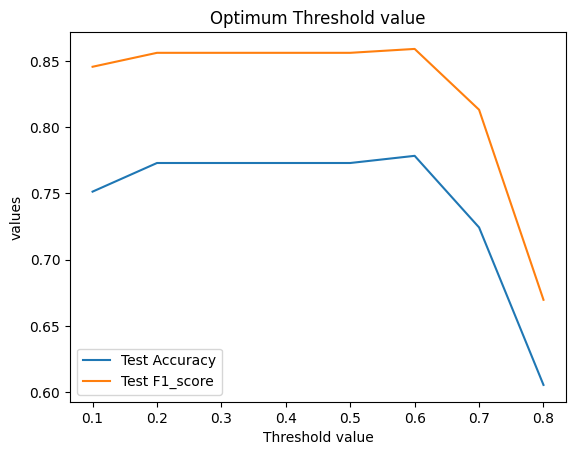

In [97]:
plt.plot(df_logistic["Decision Threshold"],df_logistic["Test Accuracy"],label="Test Accuracy")
plt.plot(df_logistic["Decision Threshold"],df_logistic["Test F1_score"],label="Test F1_score")
plt.title("Optimum Threshold value")
plt.xlabel("Threshold value")
plt.ylabel("values")
plt.legend()
plt.show()

**Build model with threshold = 0.6**

In [98]:
thresh = 0.6 ### Optimum threshold chosen from above Curves

model_lr = LogisticRegression(solver='liblinear',random_state=11,n_jobs=-1)
model_lr.fit(x_train,y_train)

y_test_prob_predict_lr = model_lr.predict_proba(x_test)[:,1]
y_test_predict_lr2=np.array([1 if i>thresh else 0 for i in y_test_prob_predict_lr])

In [99]:
test_data_accuracy_lr2=accuracy_score(y_test,y_test_predict_lr2)
test_f1score_lr2 = f1_score(y_test,y_test_predict_lr2)

print("Logistic Regression:")
print(f"Accuracy of test data ={round(test_data_accuracy_lr2*100,2)}%")
print(f"F1 score on test data ={test_f1score_lr2}")

Logistic Regression:
Accuracy of test data =77.84%
F1 score on test data =0.8591065292096219


In [100]:
print(classification_report(y_test,y_test_predict_lr2))

              precision    recall  f1-score   support

           0       0.90      0.33      0.48        58
           1       0.76      0.98      0.86       127

    accuracy                           0.78       185
   macro avg       0.83      0.66      0.67       185
weighted avg       0.81      0.78      0.74       185



Observation:

* We can see using threshold of 0.6 there is increase in models performance as accuracy increased to 77.84 % and f1_score increased to 0.8591.
* Now we can try with other classifiers and see their performance.

**Model 2 : KNN Classifier**

In [101]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold

#Stratified k-Fold Cross Validation with shuffle split
kfold_KNN=StratifiedKFold(n_splits=10,shuffle=True,random_state=11)

In [102]:
def Val_score(n_neighbors):
    '''
  Takes range of n_neighbors as input
  Returns Mean f1 score and Standard Deviation for each value of n_neighbors
  '''
    avg_fscore = []
    std = []

    for i in n_neighbors:

    # 10 fold cross validation for every value of n_neighbor
      f_score = cross_val_score(KNC(n_neighbors=i, n_jobs=-1) , X=x_train, y=y_train, cv=kfold_KNN, scoring='f1')

    # Adding mean to avg list
      avg_fscore.append(f_score.mean())

    # Adding standard deviation to std list
      std.append(f_score.std())

    return avg_fscore, std

In [103]:
n_neighbors = range(1,50,2)
mean_fscore, std = Val_score(n_neighbors)

**Ploting Mean Validation Score for each K value**

In [104]:
pd.DataFrame({'N_neighbors': n_neighbors, 'f_Score': mean_fscore,"standard_Deviation":std}
            ).sort_values(by='f_Score', ascending=False).head()

,N_neighbors,f_Score,standard_Deviation
9,19,0.877843,0.038733
8,17,0.877683,0.037322
6,13,0.876871,0.036944
10,21,0.876053,0.033411
7,15,0.875567,0.037833


Text(0.5, 1.0, 'Mean Validation score')

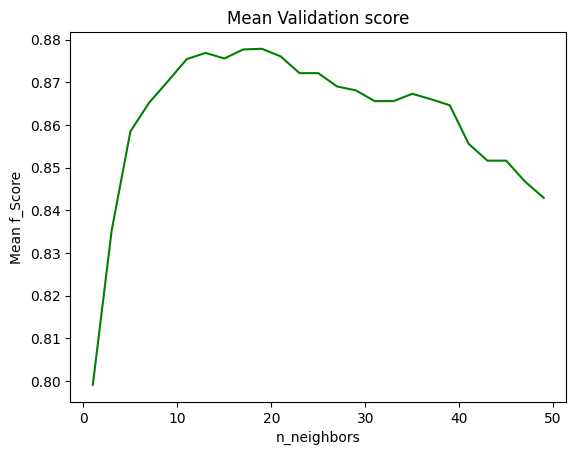

In [105]:
plt.plot(n_neighbors, mean_fscore, color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean f_Score')
plt.title('Mean Validation score')

**Build optimal model with k=19**

In [106]:
model_KNC = KNC(n_neighbors = 19,n_jobs=-1)
model_KNC.fit(x_train,y_train)

## Predict values using train data
y_train_predict_KNC=model_KNC.predict(x_train)

## Predict values using test data
y_test_predict_KNC=model_KNC.predict(x_test)

**KNN Model Evaluation**

In [107]:
# Accuracy score on training data
training_data_accuracy_KNC=accuracy_score(y_train,y_train_predict_KNC)

# Accuracy on test data
test_data_accuracy_KNC=accuracy_score(y_test,y_test_predict_KNC)

# F1 score on train-test data
train_f1score_KNC = f1_score(y_train,y_train_predict_KNC)
test_f1score_KNC = f1_score(y_test,y_test_predict_KNC)

print("KNN Classifier:")
print(f"Accuracy of training data ={round(training_data_accuracy_KNC*100,2)}%")
print(f"Accuracy of test data ={round(test_data_accuracy_KNC*100,2)}%")
print(f"F1 score on train data ={train_f1score_KNC}")
print(f"F1 score on test data ={test_f1score_KNC}")

KNN Classifier:
Accuracy of training data =81.82%
Accuracy of test data =76.22%
F1 score on train data =0.8814589665653496
F1 score on test data =0.8513513513513514


In [108]:
print(classification_report(y_test,y_test_predict_KNC))

              precision    recall  f1-score   support

           0       0.94      0.26      0.41        58
           1       0.75      0.99      0.85       127

    accuracy                           0.76       185
   macro avg       0.84      0.63      0.63       185
weighted avg       0.81      0.76      0.71       185



Observation:

* KNN classifier gives accuracy of 76.76 % and f1_score of 0.854 on test data which is less compare to logistic regression.
* Now we try SVM classifier.

**Model 3 : Support Vector Classifier**

In [109]:
from sklearn.model_selection import KFold,StratifiedKFold

#Stratified k-Fold Cross Validation with shuffle split
kfold_SVM=StratifiedKFold(n_splits=10,shuffle=True,random_state=11)

**Cross validation for hyperparameter c**

In [110]:
def linear_Val_score(c_list):

    linear= []
    rbf = []
    poly = []

    for c in c_list:
        f_score_linear = cross_val_score(svm.SVC(kernel='linear',C=c,random_state=11) , X=x_train, y=y_train, cv=kfold_SVM, scoring='f1')
        f_score_rbf = cross_val_score(svm.SVC(kernel='rbf',C=c,random_state=11) , X=x_train, y=y_train, cv=kfold_SVM, scoring='f1')
        f_score_poly = cross_val_score(svm.SVC(kernel='poly',C=c,random_state=11) , X=x_train, y=y_train, cv=kfold_SVM, scoring='f1')

        linear.append(f_score_linear.mean())
        rbf.append(f_score_rbf.mean())
        poly.append(f_score_poly.mean())

    return linear,rbf,poly

In [111]:
c_list = [0.001,0.01,0.1,1,5]
linear_fscore,rbf_fscore,poly_fscore = linear_Val_score(c_list)

In [112]:
df_linear_svm=pd.DataFrame({"C_value":c_list,"linear_kernel":linear_fscore,"rbf_kernel":rbf_fscore,"poly_kernel":poly_fscore})
df_linear_svm

,C_value,linear_kernel,rbf_kernel,poly_kernel
0,0.001,0.814871,0.814871,0.814871
1,0.010,0.886646,0.814871,0.814871
2,0.100,0.886646,0.846893,0.853690
3,1.000,0.886646,0.884050,0.867108
4,5.000,0.886646,0.851160,0.855084


**Hyperparameter Optimization using GridSearch CV**

In [113]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Declare parameters for hyperparameter tuning
parameters = [ {'C':[0.01, 0.1, 1, 5], 'kernel':['linear']},
               {'C':[0.01, 0.1, 1, 5], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[0.01, 0.1, 1, 5], 'kernel':['poly'], 'degree': [2,3] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]

grid_search = GridSearchCV(estimator = svm.SVC(),param_grid = parameters,scoring = 'f1',cv = 5,verbose=0,n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 5], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 5],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 5], 'degree': [2, 3],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='f1')

**Examine the best model**

In [114]:
# Best score achieved during the GridSearchCV
print(f"GridSearch CV best score = {grid_search.best_score_}")

# Print parameters that give the best results
print(f"Parameters that give the best results = {grid_search.best_params_}")

# Print estimator that was chosen by the GridSearch
print(f"Estimator that was chosen by the search  = {grid_search.best_estimator_}")

GridSearch CV best score = 0.8856320144618991
Parameters that give the best results = {'C': 0.01, 'kernel': 'linear'}
Estimator that was chosen by the search  = SVC(C=0.01, kernel='linear')


**Build model using estimator chosen by gridsearch**

In [115]:
model_SVM = svm.SVC(C=0.01, kernel='linear')
model_SVM.fit(x_train,y_train)

SVC(C=0.01, kernel='linear')

In [117]:
## Predict values using train data
y_train_predict_SVM=model_SVM.predict(x_train)

## Predict values using test data
y_test_predict_SVM=model_SVM.predict(x_test)

**SVM Model Evaluation**

In [118]:
# Accuracy score on training data
training_data_accuracy_SVM=accuracy_score(y_train,y_train_predict_SVM)

# Accuracy on test data
test_data_accuracy_SVM=accuracy_score(y_test,y_test_predict_SVM)

# F1 score on train-test data
train_f1score_SVM = f1_score(y_train,y_train_predict_SVM)
test_f1score_SVM = f1_score(y_test,y_test_predict_SVM)

print("SVM Classifier:")
print(f"Accuracy of training data ={round(training_data_accuracy_SVM*100,2)}%")
print(f"Accuracy of test data ={round(test_data_accuracy_SVM*100,2)}%")
print(f"F1 score on train data ={train_f1score_SVM}")
print(f"F1 score on test data ={test_f1score_SVM}")

SVM Classifier:
Accuracy of training data =82.52%
Accuracy of test data =77.3%
F1 score on train data =0.8854961832061069
F1 score on test data =0.8561643835616439


In [119]:
print(classification_report(y_test,y_test_predict_SVM))

              precision    recall  f1-score   support

           0       0.90      0.31      0.46        58
           1       0.76      0.98      0.86       127

    accuracy                           0.77       185
   macro avg       0.83      0.65      0.66       185
weighted avg       0.80      0.77      0.73       185



Observation:

* SVM classifier gives accuracy of 77.3 % and f1_score of 0.856 on test data which is high compare to KNN classifier but still less compare to modified logistic regression model.
* Now we try Random Forest classifier.

**Model 4: Random Forest Classifier**

In [120]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import RandomizedSearchCV

In [121]:
# Number of trees in random forest
n_estimators = list(range(200,2200,200))

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = list(range(10,120,10))
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 5]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [122]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

In [123]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 5 fold cross validation,
# Search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RFC(n_jobs=-1,random_state=11), param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, scoring='f1',random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=11),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 5],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [124]:
# Best score achieved during the RandomSearchCV
print(f"RandomSearch CV best score = {rf_random.best_score_}")

# Print parameters that give the best results
print(f"Parameters that give the best results = {rf_random.best_params_}")

# Print estimator that was chosen by the RandomSearch
print(f"Estimator that was chosen by the Randomsearch  = {rf_random.best_estimator_}")

RandomSearch CV best score = 0.8856320144618991
Parameters that give the best results = {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Estimator that was chosen by the Randomsearch  = RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=1600,
                       n_jobs=-1, random_state=11)


**Build model using estimator chosen by Randomsearch**

In [125]:
model_RFC = RFC(max_depth=10, min_samples_leaf=5, n_estimators=1600,n_jobs=-1, random_state=11)
model_RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=1600,
                       n_jobs=-1, random_state=11)

In [126]:
## Predict values using train data
y_train_predict_RFC=model_RFC.predict(x_train)

## Predict values using test data
y_test_predict_RFC=model_RFC.predict(x_test)

**RFC Model Evaluation**

In [127]:
# Accuracy score on training data
training_data_accuracy_RFC=accuracy_score(y_train,y_train_predict_RFC)

# Accuracy on test data
test_data_accuracy_RFC=accuracy_score(y_test,y_test_predict_RFC)

# F1 score on train-test data
train_f1score_RFC = f1_score(y_train,y_train_predict_RFC)
test_f1score_RFC = f1_score(y_test,y_test_predict_RFC)

print("Random Forest Classifier:")
print(f"Accuracy of training data ={round(training_data_accuracy_RFC*100,2)}%")
print(f"Accuracy of test data ={round(test_data_accuracy_RFC*100,2)}%")
print(f"F1 score on train data ={train_f1score_RFC}")
print(f"F1 score on test data ={test_f1score_RFC}")

Random Forest Classifier:
Accuracy of training data =82.52%
Accuracy of test data =77.3%
F1 score on train data =0.8854961832061069
F1 score on test data =0.8561643835616439


In [128]:
print(classification_report(y_test,y_test_predict_RFC))

              precision    recall  f1-score   support

           0       0.90      0.31      0.46        58
           1       0.76      0.98      0.86       127

    accuracy                           0.77       185
   macro avg       0.83      0.65      0.66       185
weighted avg       0.80      0.77      0.73       185



Observation:

* Random Forest classifier gives results almost similar to SVM classifier i.e accuracy of 77.3 % and f1_score of 0.856 on test data.

**Model Performance Comparision**

In [130]:
model=['Logistic Regression','KNN Classifier','Support Vector Classifier','Random Forest Classifier']
accuracy=[test_data_accuracy_lr2,test_data_accuracy_KNC,test_data_accuracy_SVM,test_data_accuracy_RFC]
f_score=[test_f1score_lr2,test_f1score_KNC,test_f1score_SVM,test_f1score_RFC]

model_df=pd.DataFrame({"Model":model,"Accuracy":accuracy,"F1_score":f_score})
model_df.sort_values(by=["F1_score"],ascending=False)

,Model,Accuracy,F1_score
0,Logistic Regression,0.778378,0.859107
2,Support Vector Classifier,0.772973,0.856164
3,Random Forest Classifier,0.772973,0.856164
1,KNN Classifier,0.762162,0.851351


Observation:

* From above we conclude that, among all models Logistic Regression gave best results with accuracy of 77.84 % and f1_score of 0.859.